In [30]:
import os
import numpy as np
import pandas as pd
import uproot as ur

from matplotlib import pyplot as plt
from IPython.display import Image
pd.set_option('display.max_columns', None) # to see all columns of df.head()
pd.set_option('display.max_rows', None)

# Lauren's colors
L_colors = ['red', 'darkorange', 'gold', 'limegreen', 'green', 'deepskyblue', 'blue', 'black']

In [31]:
n_pt_bins = 4
jet_pt_lo = np.array([20, 100, 500, 1000])
jet_pt_hi = np.array([30, 120, 550, 1100])

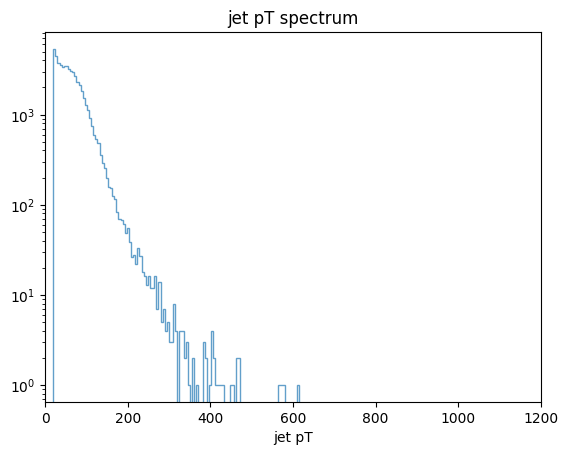

[0.01446676 0.03552625 0.04752365 0.05488515 0.05727298 0.05804175
 0.05561897 0.05211294 0.05058706 0.04931743 0.04808275 0.04449518
 0.04448353 0.04143177 0.03938173 0.03871779 0.03700554 0.03680753
 0.03340633 0.03345292 0.03351116 0.03134464 0.0281764  0.02328426
 0.00894563]
[0.05681649 0.09030262 0.08603533 0.0734757  0.06691637 0.05931351
 0.05221377 0.0470893  0.04470408 0.03848017 0.0373062  0.03577818
 0.03210719 0.02985242 0.0280076  0.02756038 0.02608825 0.0236285
 0.02374031 0.02383348 0.02217501 0.0202184  0.02040474 0.01908169
 0.01431127]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


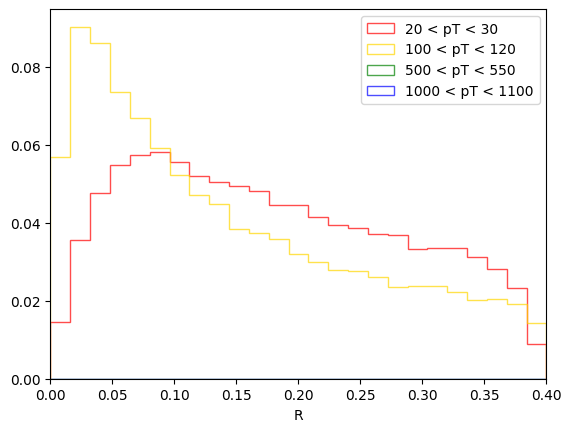

In [37]:
f = ur.open("./R0p4.root")

h_jetpt = f["h_jetpt"]
bin_edges = h_jetpt.axis("x").edges()
plt.hist(bin_edges[:-1], bin_edges, weights=h_jetpt.values(), lw=1, histtype = 'step', alpha=0.7, fill=False)
plt.title("jet pT spectrum") 
plt.xlabel('jet pT')
plt.xlim(0, 1200)
plt.yscale('log')
plt.show()

hs = [f["h_jetshape_pt_{}".format(i)] for i in range(n_pt_bins)]

bin_edges = hs[0].axis("x").edges()

for i in range(n_pt_bins):
    counts = hs[i].values()
    print(counts)
    plt.hist(bin_edges[:-1], bin_edges, weights=counts, edgecolor=L_colors[2*i], lw=1, histtype = 'step', alpha=0.7, fill=False, label='{} < pT < {}'.format(jet_pt_lo[i], jet_pt_hi[i]))

plt.legend(loc='upper right')
#plt.title(r'\frac{1]{N_\text{jet}}\frac{dN}{d\Delta R}') 
plt.xlabel('R')
plt.xlim(0, 0.4)
plt.show()
